# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from statistics import mode
import missingno as msno
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
#@title Kaggle Credential

import json

username = "marziehphi" #@param {type: "string"}
api_key = "811c3da8b6395340e3edb6d484c7943a" #@param {type: "string"}


if username and api_key:
    token = {"username": username, "key": api_key}

    !mkdir ~/.kaggle
    !mkdir /content/.kaggle
    with open('/content/.kaggle/kaggle.json', 'w') as f:
        json.dump(token, f)

    !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
    !chmod 600 /root/.kaggle/kaggle.json

    print('Your are ready to use kaggle API!')

Your are ready to use kaggle API!


In [3]:
!mkdir -p /content/data/
!kaggle datasets download -d osmi/mental-health-in-tech-survey
!unzip -q mental-health-in-tech-survey.zip -d /content/data/

mental-health-in-tech-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


# Initial Understanding of the data
- There are 27 columns and 1259 entries.
- Except the age column, all the columns have object datatype.
- **comment** column has the most null value(86 percent). it makes sense because it was an optional text box.
- **state** column is a second column with the highest null values (41 percent).

In [4]:
# Read and head dataset
data = pd.read_csv('/content/data/survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
# step 1: understanding the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# step 2: Understanding the shape of the dataset
print('the dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))
display(data.dtypes.value_counts())

the dataset has 1259 rows and 27 columns


object    26
int64      1
dtype: int64

In [7]:
# step 3: Understanding the amount of missing or noll entries
display((data.isnull().sum().sort_values(ascending=False)) / len(data))

comments                     0.869738
state                        0.409055
work_interfere               0.209690
self_employed                0.014297
benefits                     0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
family_history               0.000000
treatment                    0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
care_options                 0.000000
obs_consequence              0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
Timestamp   

# Dropping misleading columns
- **Country** column is pointless because it leads us to conclude that a certain country for example US (60 percent) faces more problem with mental health which is not a good understanding of the cause.
- Moreover there are lots of countries with only one respondent.
- With the same reason **state** column is pointless as well.
- In this stage of work **timestamp** column does not help us in reaching our objective.
- The **Comment** column has so much noll and there is no appropriate way to fill it.

In [8]:
# step 4: making decision on which columns need to remove
display(data['Country'].value_counts() / len(data['Country']))
print('\n \n')
display(data['state'].unique())

United States             0.596505
United Kingdom            0.146942
Canada                    0.057188
Germany                   0.035743
Netherlands               0.021446
Ireland                   0.021446
Australia                 0.016680
France                    0.010326
India                     0.007943
New Zealand               0.006354
Italy                     0.005560
Sweden                    0.005560
Poland                    0.005560
Switzerland               0.005560
Belgium                   0.004766
Brazil                    0.004766
South Africa              0.004766
Israel                    0.003971
Singapore                 0.003177
Bulgaria                  0.003177
Finland                   0.002383
Mexico                    0.002383
Russia                    0.002383
Austria                   0.002383
Croatia                   0.001589
Denmark                   0.001589
Portugal                  0.001589
Greece                    0.001589
Colombia            

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [9]:
# step 5: Drop the Timestamp, Country, state, comments columns
_data = data.drop(columns=['Timestamp', 'Country', 'state', 'comments'])

In [10]:
_data

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [11]:
# step 6: modification of the column format
col_list = []
for col in _data.columns:
    # strip(), return a copy of the string and remove leading and trailing character removed
    col = col.strip()
    # lower(), chnage the string to lowercase
    col = col.lower()
    # replace the "" with "_"
    col = col.replace(' ', '_')
    # append the changes
    col_list.append(col)

# replace the changes to dataframe columns
_data.columns = col_list
# head data
_data.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# modification of the age and gender columns
- **age** column could not be negative and below 15.
- gender categorized as:

| Male gender |
|-|
| Male, or cis Male, means born as male and decide to be male |


| Female gender |
|-|
| Female, or cis Female, means born as female and decide to be female |

| Other gender |
|-|
| sexual and gender identities other than straight and cisgender. Lesbian, gay, bisexual, and transgender people  |

**Note!**:
Male population in the dataset is 4 times more than female population. we need in mind and avoid making inference that males are more likely to have mental health issues becuase we know the number of males in tech industry is more than female.

In [12]:
# step 7: modification of the age and gender column
print('dataset age groups range: \n')
display(_data['age'].unique())
print('\n \n')
print('the gender notation: \n')
display(_data['gender'].unique())

dataset age groups range: 



array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])


 

the gender notation: 



array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [13]:
# step 7: modification of age and gender columns
_data.drop(_data[_data['age'] < 0].index, inplace = True) 
_data.drop(_data[_data['age'] > 100].index, inplace = True)

_data['gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

_data['gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

_data["gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

display(_data['age'].unique())
display(_data['gender'].unique())
display(_data['gender'].value_counts())

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

array(['Female', 'Male', 'Other'], dtype=object)

Male      988
Female    247
Other      19
Name: gender, dtype: int64

In [14]:
# checking missing value one more time
display((_data.isnull().sum().sort_values(ascending=False)) / len(data))

work_interfere               0.208896
self_employed                0.014297
obs_consequence              0.000000
care_options                 0.000000
gender                       0.000000
family_history               0.000000
treatment                    0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
wellness_program             0.000000
mental_vs_physical           0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
age                          0.000000
dtype: float64

In [15]:
display(_data.describe(include = 'all'))

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1254.000000,1254,1236,1254,1254,991,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254,1254
unique,NaN,3,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2
top,NaN,Male,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
freq,NaN,988,1092,764,633,464,289,881,1028,474,499,839,643,816,561,489,922,772,514,1005,556,574,1072
mean,32.019139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7.375005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# step 8: solving missing value of the self_employed column
_data['self_employed'] = _data['self_employed'].replace(np.nan, 'No')

In [17]:
# step 8: solving missing value in work_interfere 
mode_size = mode(_data['work_interfere'])
_data['work_interfere'].fillna(mode_size, inplace=True)

In [18]:
_data.head()

,age,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [19]:
display(_data.isnull().sum())

age                          0
gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

# Data Analysis and Inferences
All of analysis is based on the respondents result in Tech company.

# How many peopel seeking for mental health treatment.
- looking at the first graph, we can see around 50.5 percent get a treatment, and around 49.5 percent do not get any treatment.
- It is important for an industry to support mental disorders of their employees because it helps to have more productive in the workplace.


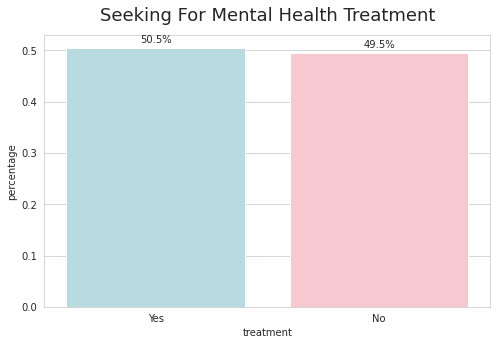

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))

plt.title('Seeking For Mental Health Treatment', y=1.03, fontsize=18)
treat_percentage = _data['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'percentage')

ax = sns.barplot(data=treat_percentage, x='treatment', y='percentage', palette=['#b0e0e6',"#FFC0CB"])

# show the percentage on top of barchart
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')

plt.show()

# Employees mindset on treatment with/without family mental health
- Close to 39 percent of employees say **Yes** to the question 'Do you have a family history of mental illness'. The right plot, also shows they significantly want to get treatment rather than the group without a family history.

So, we could **conclude** that employee with family history on mental health pay more attention to mental illness. Also, peopel with family history of mental issue are more in the risk of mental illness.

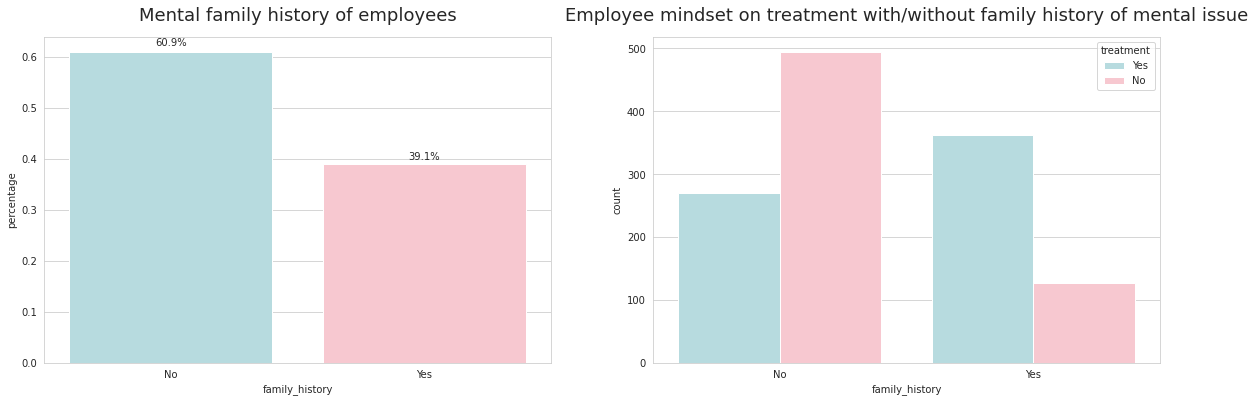

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
family_percent = _data['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'percentage')

ax = sns.barplot(data=family_percent, x='family_history', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Mental family history of employees', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['family_history'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Employee mindset on treatment with/without family history of mental issue', y=1.03, fontsize=18)

plt.show()

# Checking the relation between type of employment and willingness for treatment.

- In the left plot, we could see around 11 percent are self-employed, and about 88 percent are not self-employed. there is a huge difference between peopel who are self-employed and who are not.
- In the right plot, we observed the number of peopel who seek for treatment in both categories is more and less similar.

So, we **conclude** type of employment does not largely affect on employees decision on seeking/do not seeking for treatment.

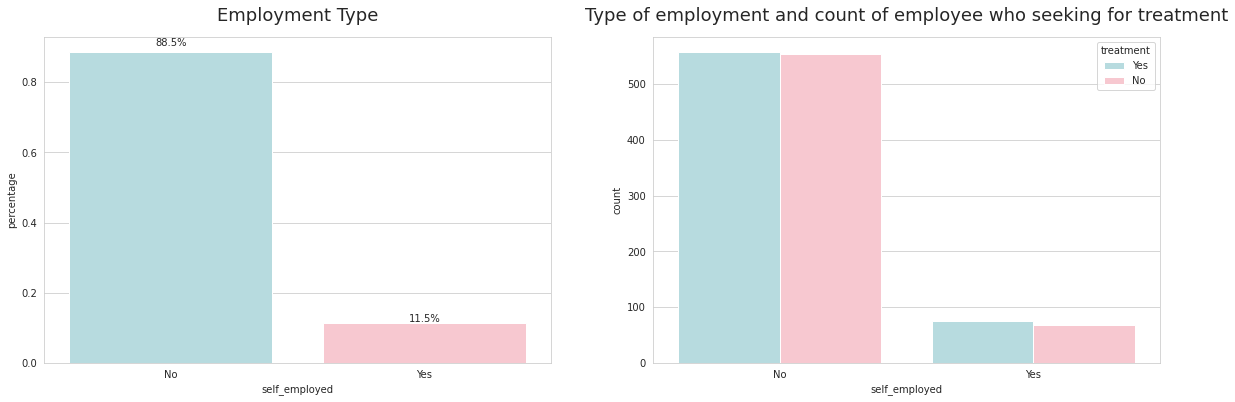

In [22]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
employee_percent = _data['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'percentage')

ax = sns.barplot(data=employee_percent, x='self_employed', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Employment Type', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['self_employed'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Type of employment and count of employee who seeking for treatment', y=1.03, fontsize=18)

plt.show()

# Type of working of employees and their willingness to take action for treatment.

- around 70 percent do not work remotely. it means mental health disorder more came from workplaces.
- the rigth plot shows type of work can not affect on seeking for the mental health treatment because the difference between employees who want to get treatment and do not want to get treatment are slightly different.

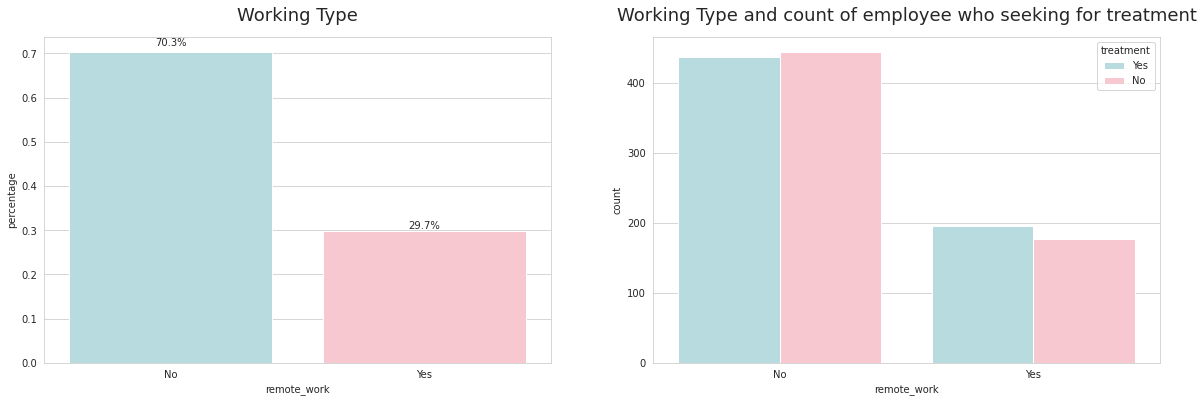

In [23]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
work_percent = _data['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'percentage')

ax = sns.barplot(data=work_percent, x='remote_work', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Working Type', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['remote_work'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Working Type and count of employee who seeking for treatment', y=1.03, fontsize=18)

plt.show()

# Mental Health condition of employees interferes with their work

- In this stage, we need to consider 'sometimes' and 'often' categories are a vague response to this question 'if you have a mental health issue, do you feel that it interferes with your work' because employees are too shy to share a truth or afraid of other opinions. so, they are not choosing the extreme category.

- In the right plot, we could see people who choose the 'sometimes' or 'often' categories had the highest number who seeking treatment. even, there is a small group of 'never' category who still need treatment. It happens based on different reasons like the job and position do not match with their potential.

**In this stage is necessary to take a look at company's benefit for mental health disorder**

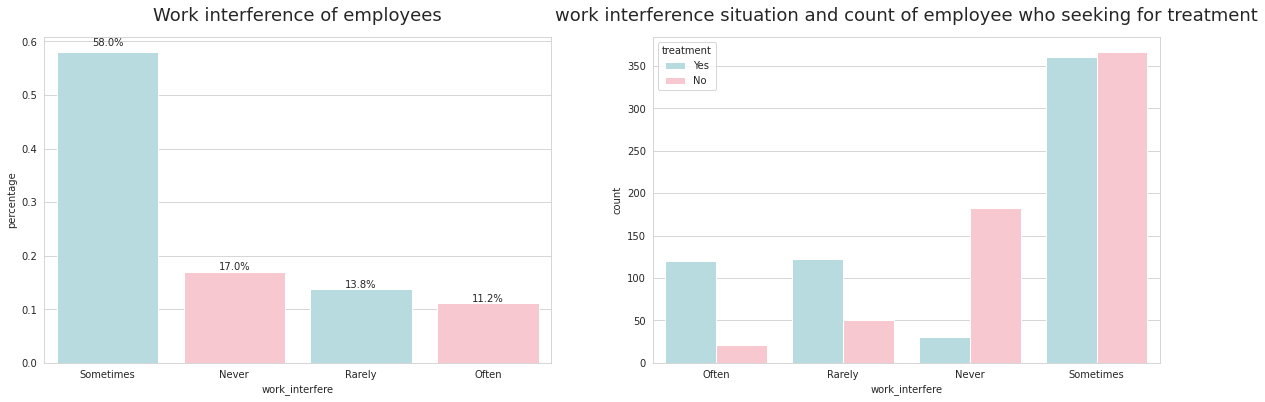

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
interfere_percent = _data['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'percentage')

ax = sns.barplot(data=interfere_percent, x='work_interfere', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Work interference of employees', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['work_interfere'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('work interference situation and count of employee who seeking for treatment', y=1.03, fontsize=18)

plt.show()

# Companies benefits for mental treatment of employees

It is good to undrestant what is benefit packages to support mental disorder. there are different way to help employees who need treatment, for example:
- Employee Assistance programs
- Wellness programs that focus on mental and physical health. 
- Health and disability insurance.
- Flexible working schedules or time off policies.

**left graph**:
- Around 38 percent, 29 percent, and 32 percent; employer provided with mental health benefits, No benefits for mental health disorder, and did not know whether they were provided with benefits or not, respectively.
**right Graph**:
- We could see, around 63 percent of employees were seeking for treatment with mental health benefits.
- We could also see, around 45 percent of employees desire to have treatment, even if there are no benefits .

It is good to check specific benefits like **wellness program** and **break from work**.


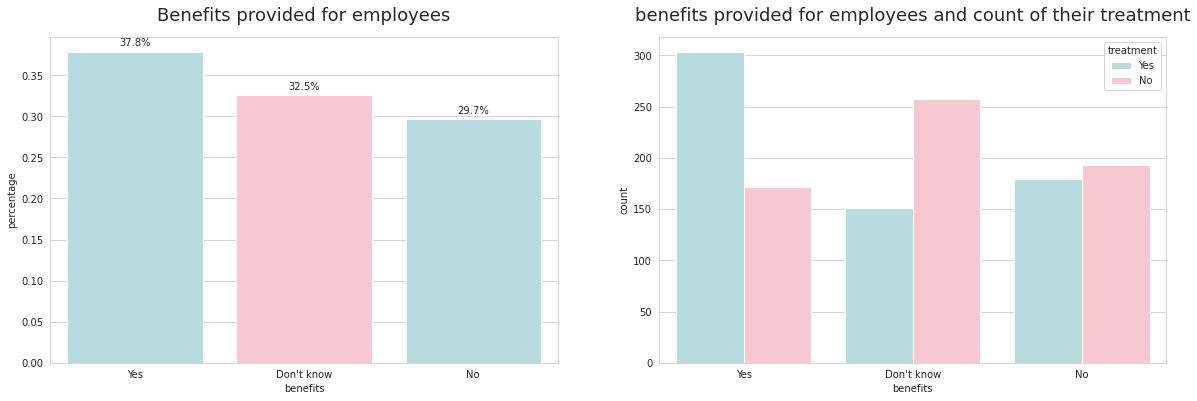

In [25]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
benefit_percent = _data['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'percentage')
ax = sns.barplot(data=benefit_percent, x='benefits', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Benefits provided for employees', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['benefits'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('benefits provided for employees and count of their treatment', y=1.03, fontsize=18)

plt.show()

# Wellness Program for helping mental health disorder
- About 19 percent say **Yes** to become a part of wellness program, and about 60 percent of those want to get treatment.
- more than 66 percent say **No** that they are not provided with any wellness program but close to half of those want to get treatment.


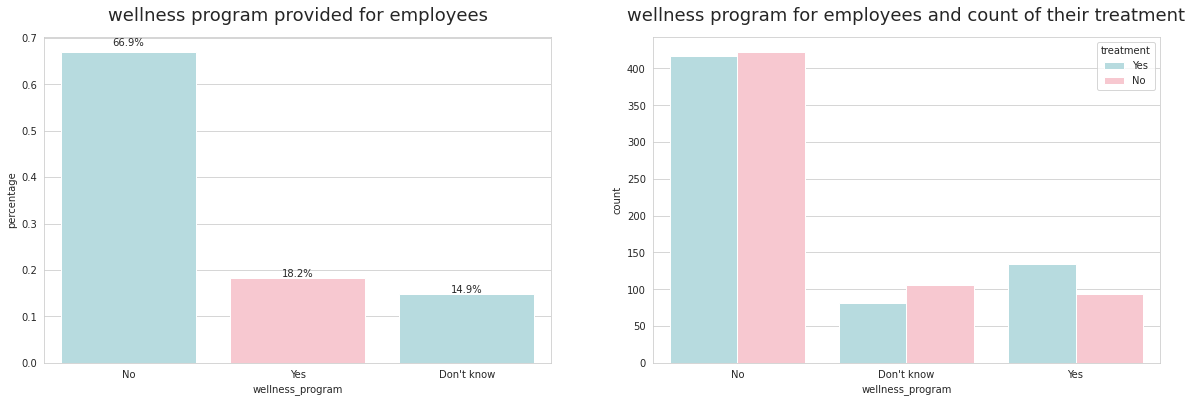

In [26]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
well_percent = _data['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'percentage')
ax = sns.barplot(data=well_percent, x='wellness_program', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('wellness program provided for employees', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['wellness_program'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('wellness program for employees and count of their treatment', y=1.03, fontsize=18)

plt.show()

# How easy for employees to take medical leave for mental issue.
- Employees who said it was 'somewhat easy' or 'very easy' to get leave had almost 50% seeking for medical help.
- around 8 percent said it is difficult, but close to 75 percent of them willing to have help.
- Also, around 45 percent of people who said 'Did not know' want to get this category treatment.

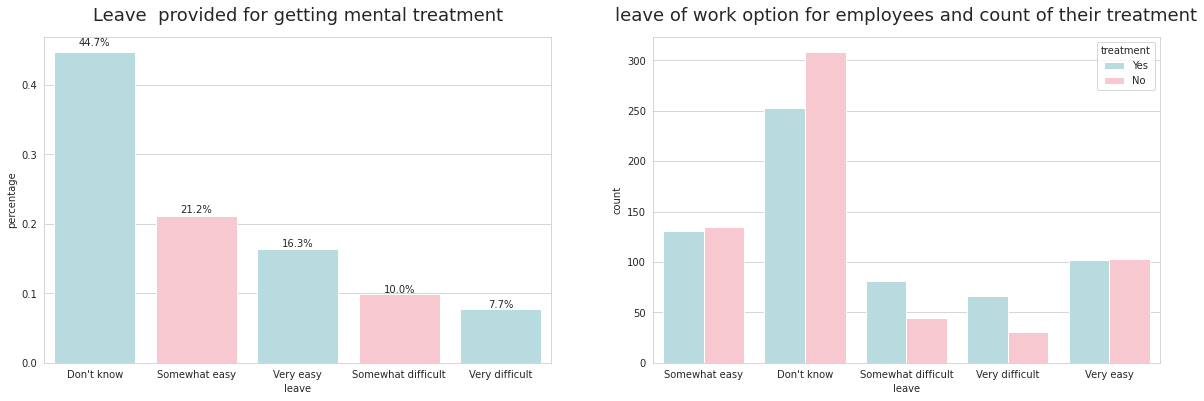

In [27]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
leave_percent = _data['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'percentage')
ax = sns.barplot(data=leave_percent, x='leave', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Leave  provided for getting mental treatment', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['leave'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('leave of work option for employees and count of their treatment', y=1.03, fontsize=18)

plt.show()

**Anonymity of employees is an imporatnt factor to let them sharing their mental health condition**

# Is employee anonymity protected if he/she wants to share her/his mental health disorder.

- Around 65 percent of people were not aware of whether anonymity was provided or not. And 30 percent said yes to the level of safety in sharing mental condition.
- We could see, in the second right plot people said yes to anonymity, around 60 percent of them were seeking for treatment. It shows employee need to feel that company has protected his or her privacy.

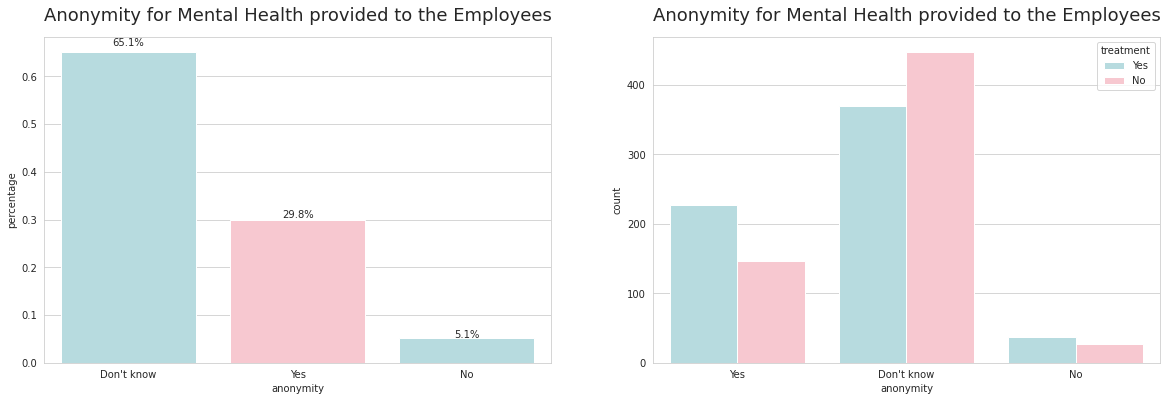

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
ano_percent = _data['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'percentage')
ax = sns.barplot(data=ano_percent, x='anonymity', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Anonymity for Mental Health provided to the Employees', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['anonymity'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Anonymity for Mental Health provided to the Employees', y=1.03, fontsize=18)

plt.show()

# consequence of discussing mental health disorder .

Discussion of the mental health condition has two side:
- From employee to coworkers and direct supervisor
- From supervisor or company to employees

## 1.Discussing mental health with coworkers
- Around 62% of the employees said that they might be comfortable discussing some type of mental problems with their coworkers, and out of them around 50% actually sought for medical help.
- 20% of the employees believed that discussing mental health with their coworkers wasn't a good option for them.

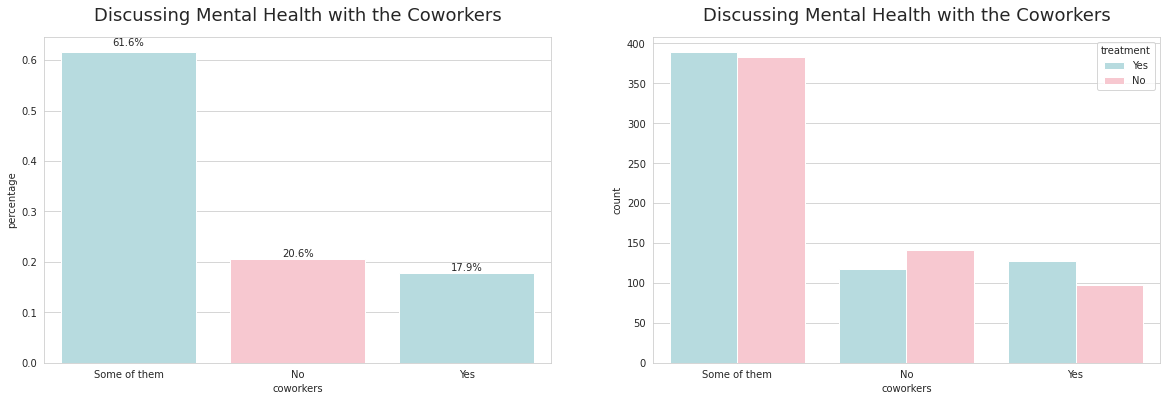

In [29]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
work_percent = _data['coworkers'].value_counts(normalize = True).rename_axis('coworkers').reset_index(name = 'percentage')
ax = sns.barplot(data=work_percent, x='coworkers', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Discussing Mental Health with the Coworkers', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['coworkers'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Discussing Mental Health with the Coworkers', y=1.03, fontsize=18)

plt.show()

## 2.Discussing mental health with direct supervisior
- This plot is quite different from the one of the coworker. Here, around 40% of the workers believe in sharing their mental health with their supervisors. This may have something to do with their performance or amount of the work that affect on their mental condition or etc.

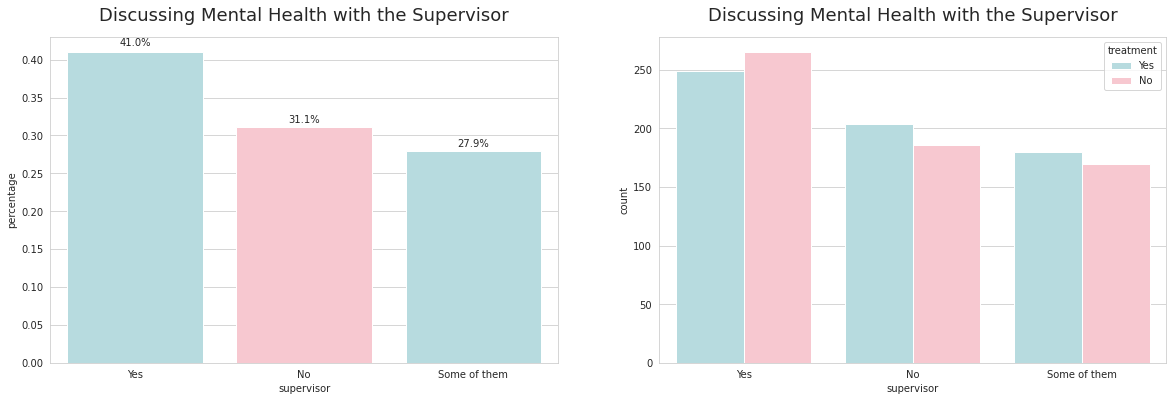

In [31]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
dir_percent = _data['supervisor'].value_counts(normalize = True).rename_axis('supervisor').reset_index(name = 'percentage')
ax = sns.barplot(data=dir_percent, x='supervisor', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Discussing Mental Health with the Supervisor', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['supervisor'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Discussing Mental Health with the Supervisor', y=1.03, fontsize=18)

plt.show()

# 3.Discussing Mental health with employers
- Around same number of people ( around 40% each ) answered Maybe as well as No for the negative impact of discussing mental health consequences with the employer and about 23% said Yes to it.

- 23% is a significant number who feel that discussing their mental health might create a negative impact on their employer. for example, decreased productivity, impact on promotions or any other preconcieved notion. it is not good to see,  there were only around 40% of the people who actually go after help, whereas in both the other categories, it is more than 50%.

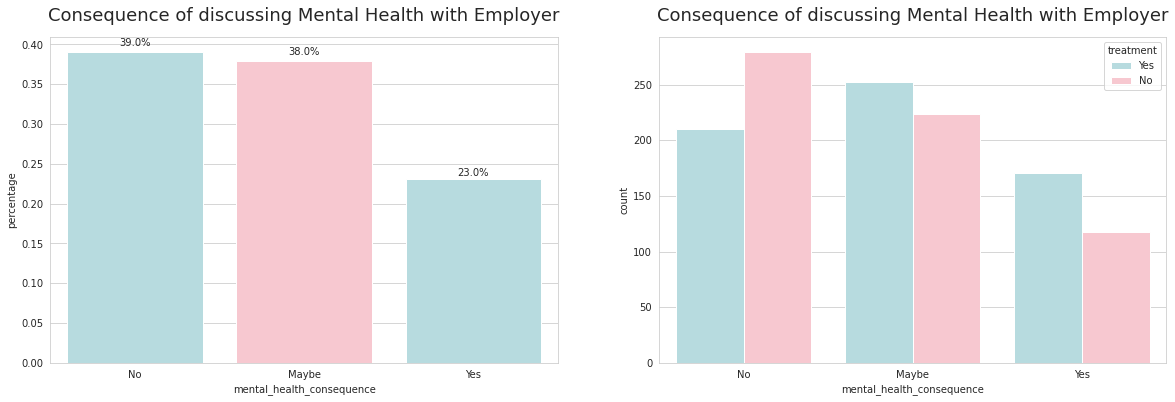

In [32]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
em_percent = _data['mental_health_consequence'].value_counts(normalize = True).rename_axis('mental_health_consequence').reset_index(name = 'percentage')
ax = sns.barplot(data=em_percent, x='mental_health_consequence', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Consequence of discussing Mental Health with Employer', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['mental_health_consequence'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('Consequence of discussing Mental Health with Employer', y=1.03, fontsize=18)

plt.show()

# look at relation between mental health and physical health of employers
- While close to 50% people said that they didn't know, the number of people who answered Yes as well as No were completely equal.
- We could say mental health issue could affect the physical health of the employers. 

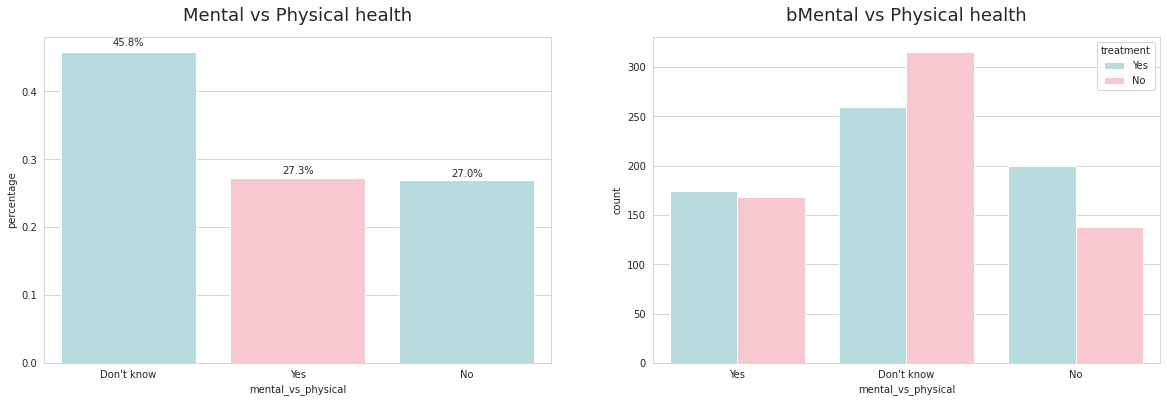

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
mu_percent = _data['mental_vs_physical'].value_counts(normalize = True).rename_axis('mental_vs_physical').reset_index(name = 'percentage')
ax = sns.barplot(data=mu_percent, x='mental_vs_physical', y='percentage', palette=['#b0e0e6',"#FFC0CB"])
for p in ax.patches:
        percentage = '{:.01f}%'.format(100 * p.get_height())
        x = p.get_x() + p.get_width() /2
        y = p.get_y() + p.get_height() * 1.02
        ax.annotate(percentage, (x, y), ha='center')
plt.title('Mental vs Physical health', y=1.03, fontsize=18)

plt.subplot(1,2,2)
sns.countplot(x=_data['mental_vs_physical'], hue=_data['treatment'],palette=['#b0e0e6',"#FFC0CB"])
plt.title('bMental vs Physical health', y=1.03, fontsize=18)

plt.show()